# CFD Homework 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# CODE STATUS:
# 9/20/22, 8:40 PM: problem 1 is completed. Working on problem 2 part a. 
# The code to evaluate sigma and the cutoff for sigma=1 results in 0.47 being chosen as the max timestep for explicit euler, which is correct for tk = 15.
# Cannot plot implicit Euler --> not sure why? 
# Have not yet coded sigma for RK4
# Need to write the plotting and the decomposition of solver into the component parts as its own function and apply to problem 2
# Then, figure out how to modify the solver to accommodate second order equations. This one has different time steps and different methods --> might be easier to rewrite, rather than modify? Not sure.

In [3]:
# CODE STATUS:
# 9/22/22, 11:47 PM: problems 1, 2, and 3 are completed (effectively). 
# Need to figure out what figures I actually want to use.
# Need to add a 'save' function for all relevant figures # --> added
# Need to modify the 'solve' function from problem 3 to make it work for problem 4 (add more input variables)
# Need to modify the eigenvalue data structure for problem 5 to make that work
# Need to write up problems 1-3
# Need to write up problem 4
# Need to write up problem 5

In [95]:
def expEuler(g,dt,xik,tk):
    xik1 = xik + dt*g(xik,tk)
    return xik1

def impEuler(g,dt,xik,tk):
    xik1 = xik / (1 + 2 * dt)
    return xik1

def RK2(g,dt,xik,tk):
    K0 = g(xik,tk)
    K1 = g(xik+dt*K0/2,tk+dt/2)
    xik1 = xik + dt*K1
    return xik1

def RK4(g,dt,xik,tk):
    K0 = g(xik,tk)
    K1 = g(xik+dt*K0/2,tk+dt/2)
    K2 = g(xik+dt*K1/2,tk+dt/2)
    K3 = g(xik+dt*K2,tk+dt)
    xik1 = xik + (K0+2*K1+2*K2+K3)*dt/6
    return xik1

def plot_vals(x1, y1, y2=[], y3=[], y4=[], tvec=[], exacty=[], logscale = False, xlabel='', ylabel='', title=''):
    plt.figure(figsize=(10,5))
    axes_internal = plt.gca()
    if logscale: 
        # axes_internal.set_yscale('log')
        axes_internal.set_xscale('log')
    if xlabel: axes_internal.set_xlabel(xlabel)
    if ylabel: axes_internal.set_ylabel(ylabel)
    if title: plt.title(title)
    if np.any(y1): plt.plot(x1,y1, label = 'Explicit Euler')
    if np.any(y2): plt.plot(x1,y2, label = 'Implicit Euler')
    if np.any(y3): plt.plot(x1,y3, label = 'RK2')
    if np.any(y4): plt.plot(x1,y4, label = 'RK4')
    if np.any(exacty): plt.plot(tvec,exacty, label = 'Exact Solution')
    plt.legend()
    plt.show()
    
    
def plot_methods(x1, y1, x2, y2, x3, y3, tvec, exacty, label1 = 'dt = 0.1',label2 = 'dt = 0.5', label3 =  'dt = 1.0', logscale = False, xlabel='time t (s)', ylabel='Solution Variable y', title='',filename=''):
    plt.figure(figsize=(10,5))
    axes_internal = plt.gca()
    if logscale: 
        # axes_internal.set_yscale('log')
        axes_internal.set_xscale('log')
    axes_internal.set_xlabel(xlabel)
    axes_internal.set_ylabel(ylabel)
    if title: plt.title(title)
    if np.any(y1): plt.plot(x1,y1, label=label1)
    if np.any(y2): plt.plot(x2,y2, label=label2)
    if np.any(y3): plt.plot(x3,y3, label=label3)
    if np.any(exacty): plt.plot(tvec,exacty, label = 'Exact Solution')
    plt.legend(loc = 'upper right')
    if len(filename) != 0:
        plt.savefig(filename+'.png')
    plt.show()


# def plot_func_old(func, x=np.linspace(0,5,3001), logscale=False, ylim=[], xlabel='', ylabel=''):
#     y = np.vectorize(func)(x)
#     plt.figure(figsize=(5,5))
#     axes_internal = plt.gca()
#     if logscale: axes_internal.set_yscale('log')
#     if len(ylim) == 2: axes_internal.set_ylim(ylim)
#     if xlabel: axes_internal.set_xlabel(xlabel)
#     if ylabel: axes_internal.set_ylabel(ylabel)
#     plt.title(func.__name__)
#     plt.plot(x,y)
#     plt.show()

In [40]:
def solver(g,xi0,tmin,tmax,exact,tvec = [0.1, 0.5, 1.0], plot=True):
    solutionvals = []
    texact = np.arange(tmin,tmax,0.1)
    exactvals = exact(texact)
    for dt in tvec:
        numvals = math.ceil(abs((tmax-tmin)/dt))+1
        vals = np.zeros((numvals, 5))
        vals [:,0] = np.linspace(tmin,tmax,numvals)
        truedt = vals[1,0] - vals[0,0]
        vals[0,1] = xi0
        vals[0,2] = xi0
        vals[0,3] = xi0
        vals[0,4] = xi0

        # for i in
        
        for i in np.arange(0,numvals-1):
            tval = vals[i,0] # 0 is tvals
            vals[i+1,1] = expEuler(g,dt,vals[i,1],tval) # 1 is exp Euler
            vals[i+1,2] = impEuler(g,dt,vals[i,2],tval) # 2 is imp Euler
            vals[i+1,3] = RK2(g,dt,vals[i,3],tval) # 3 is RK2
            vals[i+1,4] = RK4(g,dt,vals[i,4],tval) # 4 is RK4
        if plot:
            plot_vals(vals[:,0],vals[:,1],vals[:,2],vals[:,3],vals[:,4],texact,exactvals,logscale = False)
            print("true step size t =",truedt)
        solutionvals.append(vals)
    return [solutionvals,texact,exactvals] #I recognize that this is a janky way to output the data, and plan to fix it for any future ODE solving.
        

def FullSoln(g,exact,xi0,tmin,tmax,plot=True): # reshape the data and plot each solution with those from the same numerical solution scheme
    solutions = solver(g1,xi0,tmin,tmax,exact,tvec=[0.1,0.5,1.0],plot=False)
    numsoln = solutions[0]
    texact = solutions[1]
    exactvals = solutions[2]
    dt01 = numsoln[0] # dt = 0.1
    dt05 = numsoln[1] # dt = 0.5
    dt10 = numsoln[2] # dt = 1.0
    #0 is tvals
    #1 is expEuler
    #2 is impEuler
    #3 is RK2
    #4 is RK4

    if plot:
        plot_methods(dt01[:,0],dt01[:,1],dt05[:,0],dt05[:,1],dt10[:,0],dt10[:,1],texact,exactvals,filename='P1aexpEuler')# #Plot ExpEuler
        plot_methods(dt01[:,0],dt01[:,2],dt05[:,0],dt05[:,2],dt10[:,0],dt10[:,2],texact,exactvals,filename='P1aimpEuler') #Plot ImpEuler
        plot_methods(dt01[:,0],dt01[:,3],dt05[:,0],dt05[:,3],dt10[:,0],dt10[:,3],texact,exactvals,filename='P1aRK2') #Plot RK2
        plot_methods(dt01[:,0],dt01[:,4],dt05[:,0],dt05[:,4],dt10[:,0],dt10[:,4],texact,exactvals,filename='P1aRK4') #Plot RK4
    return None

In [41]:
# Problem 1
def g1(y,t):
    return -2*y

def exact1(t):
    return 4*np.exp(-2*t)


# Problem 2
def g2(y,t):
    return -y*(2+0.01*t**2)

def exact2(t):
    return 4*np.exp(-t*(2+0.01/3*t*t))



In [42]:
# Problem 1 part a
# test = solver(g1,xi0=4,tmin=0,tmax=15,exact=exact1,plot=True)

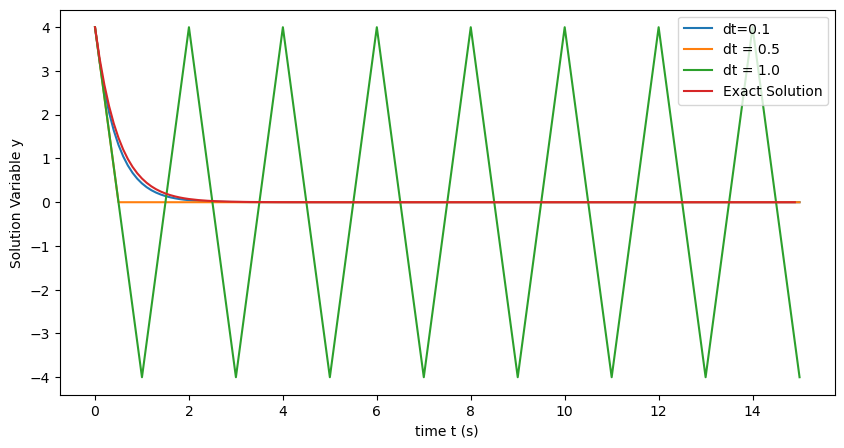

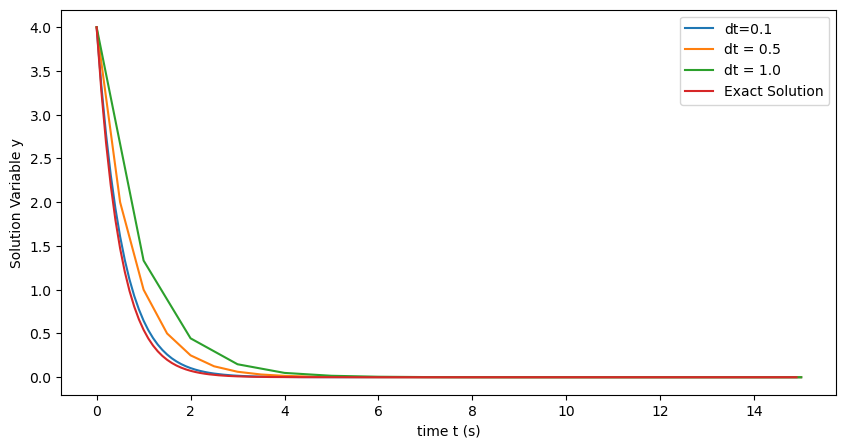

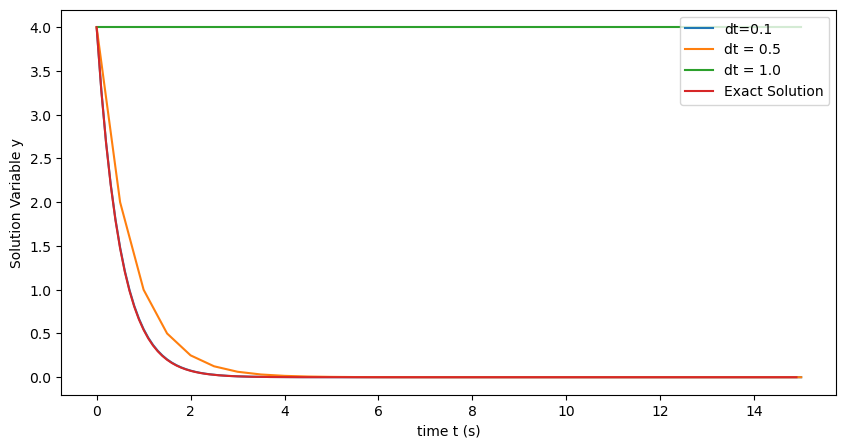

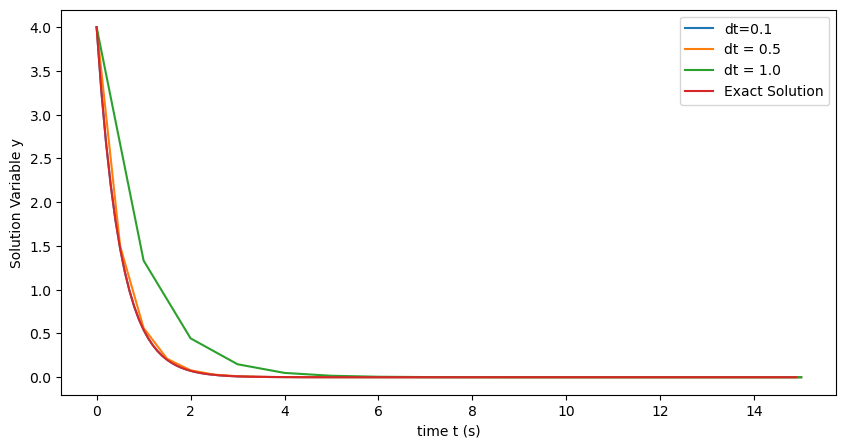

In [43]:
FullSoln(g1,exact=exact1,xi0=4,tmin=0,tmax=15,plot=True)

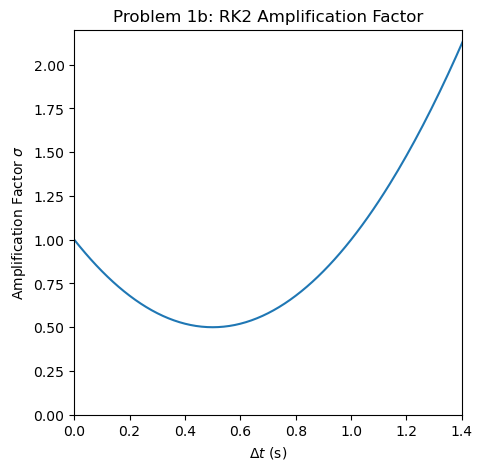

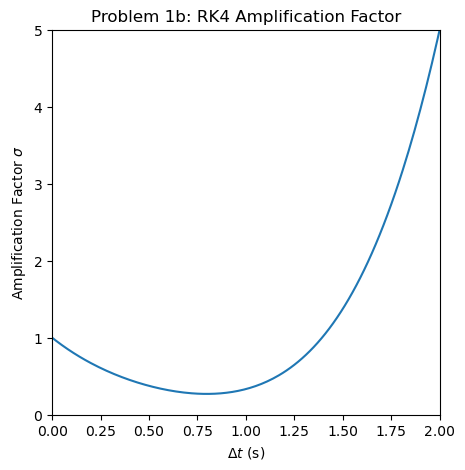

In [23]:
# Problem 1 part B:
# the function oscillates when the amplification factor sigma is negative -- this means that each successive step will be the opposite sign to the one before it.
# sigma >=0 is the requirement for the system to not oscillate.
# |sigma| <=1 is the requirement for system stability.
# Both of these must be true for the criteria of the problem to be satisfied.

dtvec = np.arange(0,1.5,0.01)
dtvec2 = np.arange(-5,5,0.01)

def sigma1RK2(dt):
    return 1 - 2*dt + 2 * dt**2

def sigma1RK4(dt):
    return 1 - 2*dt + 2*dt**2 - 4/3*dt**3 + 2/3*dt**4

plt.figure(figsize=(5,5))
axes_internal = plt.gca()
axes_internal.set_xlabel("$\Delta t$ (s)")
axes_internal.set_ylabel("Amplification Factor $\sigma$")
plt.title("Problem 1b: RK2 Amplification Factor")
plt.plot(dtvec,sigma1RK2(dtvec))
plt.xlim([0,1.4])
plt.ylim([0,2.2])
plt.savefig('P1bRK2.png')
plt.show()


plt.figure(figsize=(5,5))
axes_internal = plt.gca()
axes_internal.set_xlabel("$\Delta t$ (s)")
axes_internal.set_ylabel("Amplification Factor $\sigma$")
plt.title("Problem 1b: RK4 Amplification Factor")
plt.plot(dtvec2,sigma1RK4(dtvec2))
plt.xlim([0,2])
plt.ylim([0,5])
plt.savefig('P1bRK4.png')
plt.show()

In [35]:
# Problem 2a: draw a plot of sigma vs tk, delta t, and eliminate all delta t's for which sigma is greater than 1
def testfunc(tk,dt):
    sigma = 0.5 + 2*dt
    return abs(sigma)

def magsigmaexpEuler(tk,dt):
    sigma = 1 - dt * (2 + 0.01*tk**2)
    return abs(sigma)

def magsigmaimpEuler(tk,dt):
    sigma = 1/(1 + dt*(2 + 0.01*(tk+dt)**2))
    return abs(sigma)

def magsigma2RK2(tk,dt):
    sigma = 1 - dt * (2 + 0.01 * ((tk + dt/2)**2) ) * (1 - dt/2*(2 + 0.01*tk**2))
    return abs(sigma)

def magsigma2RK4(tk,dt):
    # All K values listed in this function are the values K divided by xik, leaving only a function of dt and tk.
    K0 = -(2 + 0.01*tk**2)
    K1 = -(2 + 0.01*(tk + dt/2)**2) * (1 - dt/2 * (2 + 0.01*tk**2))
    K2 = -(2 + 0.01*(tk + dt/2)**2) * (1 - dt/2 * (2 + 0.01*(tk + dt/2)**2) * (1 - dt/2 * (2 + 0.01*tk**2)))
    K3 = -(2 + 0.01*(tk + dt)**2)   * (1 - dt * (2 + 0.01*(tk + dt/2)**2)   * (1 - dt/2 * (2 + 0.01*(tk + dt/2)**2) * (1 - dt/2 * (2 + 0.01*tk**2)) ) )
    sigma = 1 + dt/6*(K0 + 2*K1 + 2*K2 + K3)
    return abs(sigma)


def maxdt(abssigma,Plot3D=False,title = 'INSERTTITLE'):
    tmin = 0
    tmax = 15
    dt = 0.005
    numt = math.ceil(abs((tmax-tmin)/dt))

    dtmin = 0.001
    dtmax = 1.0
    dtdt = 0.0001
    numdt = math.ceil(abs((dtmax-dtmin)/dtdt))


    tk = np.arange(tmin,tmax,dt)
    dt = np.arange(dtmin,dtmax,dtdt)



    # make matrix of sigma values (tk varies with rows, dt varies with columns), and then plot those vs t,dt
    # we want to start from the smallest time step, and go to the largest
    # if any time step size yields any sigma greater than or equal to 1, then we say the maximum time step lies within the closed interval of those two time steps
    vals = np.zeros((numt,numdt))

    for i in np.arange(0,numt):
        for j in np.arange(0,numdt):
            vals[i,j] = abssigma(tk[i],dt[j])
    vals = np.floor(vals)
    indices = np.nonzero(vals)
    indices = indices[1]
    try:
        minindex = min(indices)
        maxdt = dt[minindex-1] # take the time step size right before the one that made the magnitude >1
        print(maxdt)
    except:
        print('Stable for all dt from ',dtmin,'s to ',dtmax,'s with change in step size ',dtdt,' over the time interval t=[',tmin,', ',tmax,']',)
    
    # vals = vals[~np.isnan(vals)]
    # print(vals)
    
    if Plot3D:
        TK, DT = np.meshgrid(tk,np.arange(dtmin,dtmax,0.001))
        sigma=abssigma(TK,DT)
        # print(sigma)
        fig = plt.figure(figsize=(5,5))
        ax = plt.axes(projection='3d')
        # ax.contour3D(TK,DT,sigma,50, cmap='binary')
        ax.plot_surface(TK, DT, sigma, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
        ax.view_init(elev=20., azim=-65)
        ax.set_xlabel("$t$ (s)")
        ax.set_ylabel('$\Delta t$ (s)')
        ax.set_zlabel("$|\sigma|$")
        # plt.title(title)
        plt.savefig(abssigma.__name__+".png")
        plt.show()
    return None

0.47070000000000023


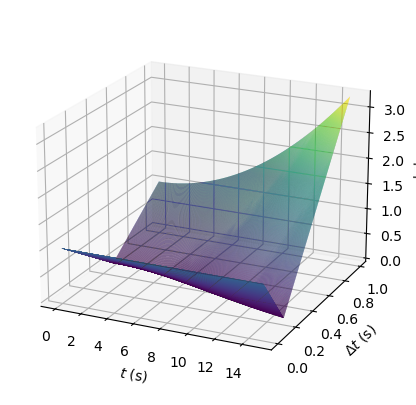

Stable for all dt from  0.001 s to  1.0 s with change in step size  0.0001  over the time interval t=[ 0 ,  15 ]


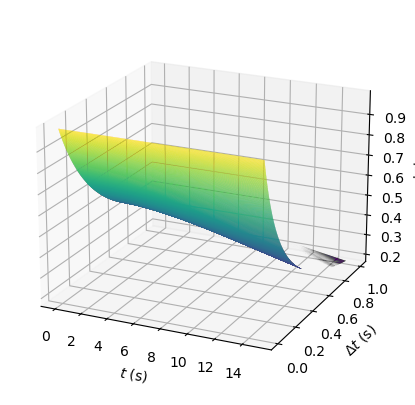

0.47070000000000023


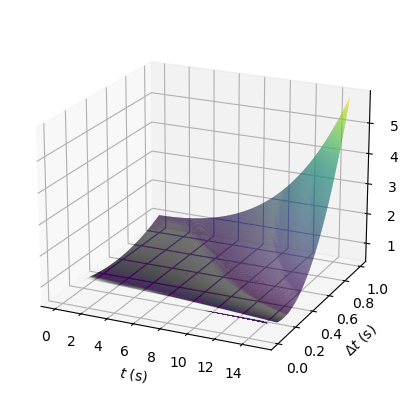

0.6410000000000003


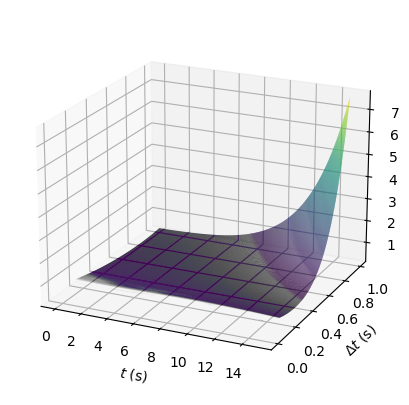

In [36]:
# maxdt(testfunc,Plot3D=True,title='Test Function')
maxdt(magsigmaexpEuler,Plot3D=True)#,title='Amplification Factor: Explicit Euler')
maxdt(magsigmaimpEuler,Plot3D=True)#,title='Amplification Factor: Implicit Euler')
maxdt(magsigma2RK2,Plot3D=True)#,title='Amplification Factor: RK2')
maxdt(magsigma2RK4,Plot3D=True)#,title='Amplification Factor: RK4')

In [12]:
# test = solver(g2,xi0=4,tmin=0,tmax=15,exact=exact2,plot=True)

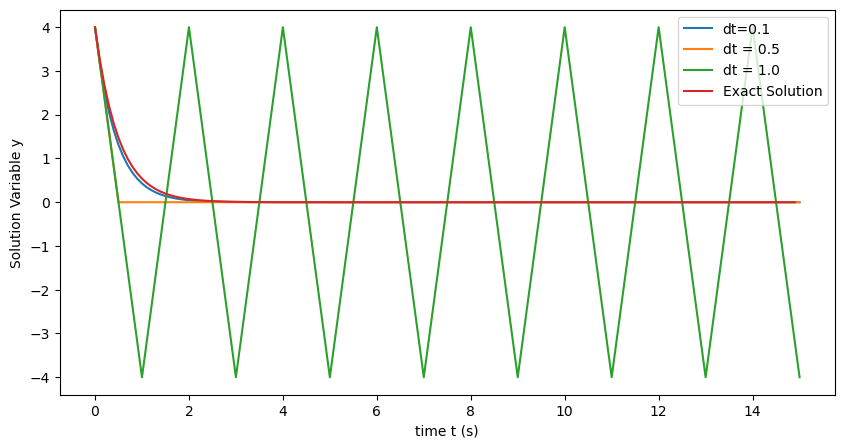

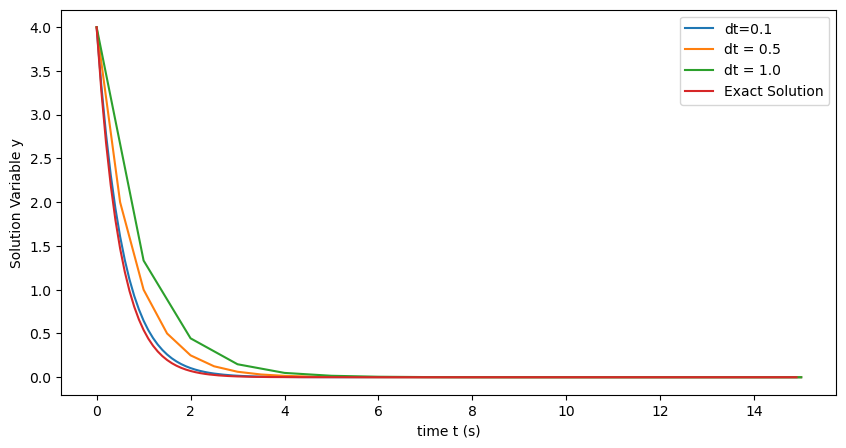

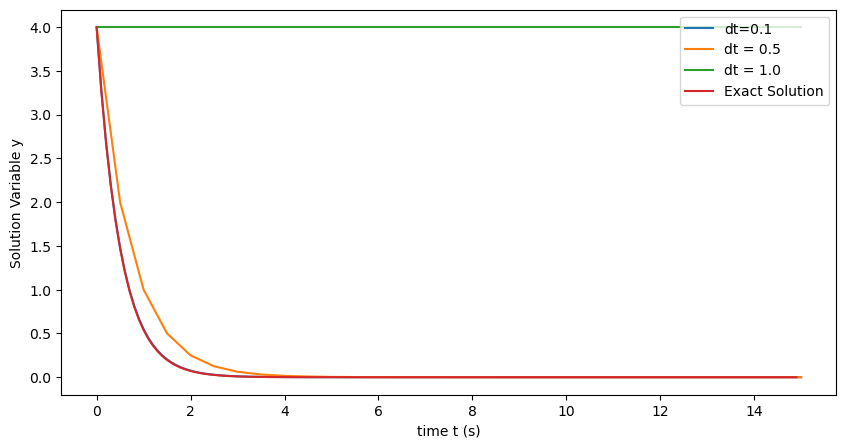

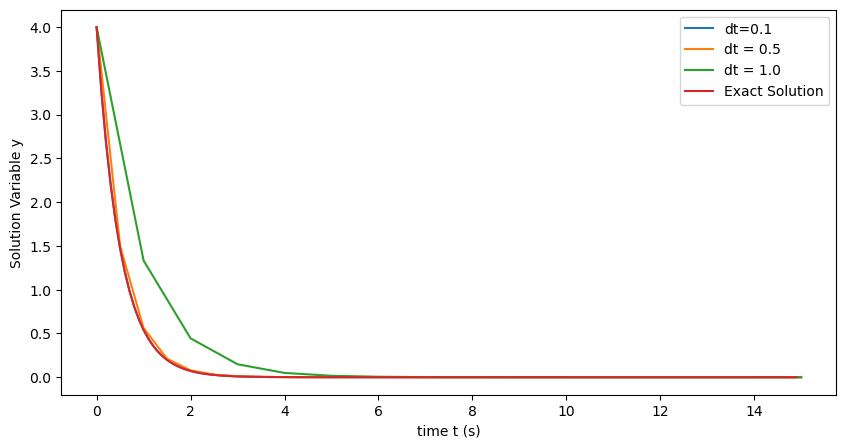

In [39]:
FullSoln(g2,exact=exact2,xi0=4,tmin=0,tmax=15)

In [52]:
# Problem 3

# g is the ODE to be solved
# xi0 is in the format [y1-0, y2-0]
# xi0=[10*math.pi/365,0]
# solvers=[expEuler,impEuler,RK2,RK4]

def SOSV2(g,xi0,tmin,tmax,solver,dt):
    numvals = math.ceil(abs((tmax-tmin)/dt))+1
    order = len(xi0)
    numcols = order+1 #(one for time)
    vals = np.zeros((numvals, numcols)) 
    vals [:,0] = np.linspace(tmin,tmax,numvals)
    for init in np.arange(0,order):
        vals[0,init+1] = xi0[init]
    for step in np.arange(0,numvals-1):
        xiklist = []
        for yindex in np.arange(0,order):
            xiklist.append(vals[step,yindex+1])
        xik = np.array(xiklist)
        xikvals = solver(g,dt,xik,tk=vals[step,0]) # it is ok to pass xik as a numpy array. Yay!
        vals[step+1,1:numcols] = xikvals
    return vals
        
        
def evaluate(tmin,tmax,dt,func):
    texact = np.arange(tmin,tmax,dt)
    return [texact,func(texact)]



In [53]:

# Note that I solve it in radians since that's required for the approximation of sin(x)\approx x
def g3a(yvec,tvec):
    y1 = yvec[0]
    y2 = yvec[1]
    g = 9.81
    L = 0.6
    gvec = np.array([y2, -g/L*y1])
    return gvec

def exact3a(t,theta0=[10*math.pi/180]):
    g = 9.81
    L = 0.6
    theta = theta0*np.cos(t*(g/L)**(1/2))
    return theta

def g3b(yvec,tvec):
    y1 = yvec[0]
    y2 = yvec[1]
    g = 9.81
    L = 0.6
    c = 4
    gvec = np.array([y2, -g/L*y1-c*y2]) #could do this with a matrix multiplication to make it faster...
    return gvec    


def exact3b(t,theta0=[10*math.pi/180]):
    g = 9.81
    L = 0.6
    c = 4
    alpha = 0.5*(4*g/L-c**2)**(0.5)
    beta = c/(4*g/L-c**2)**(0.5)
    theta = theta0 * np.exp(-c*t/2) * (np.cos(alpha*t)+beta*np.sin(alpha*t))
    return theta

# Assume that the pendulum is released from rest:
y0 = [10*math.pi/180, 0]



In [104]:
def solve(func,dtvec = [0.15,0.5,1.0],Plot=True,filetag='default'):
    solutions = []
    # dtvec = [0.15, 0.5, 1.0] # Try 0.0001,0.001,0.01,

    for solv in [expEuler, impEuler, RK4]:
        for deltat in dtvec:
            vals = SOSV2(func,[10*math.pi/180,0],tmin=0,tmax=6,solver=solv,dt=deltat) # all of these parameters need to be parameters of the main "solve" function
            solutions.append(vals)
            # plot_vals(vals[:,0],vals[:,1],xlabel='time t (s)', ylabel='Solution Variable y', title='')


    truesoln = evaluate(0,6,0.01,exact3a)

    expEulervals = solutions[0:len(dtvec)]
    impEulervals = solutions[3:2*len(dtvec)]
    RK4vals = solutions[6:3*len(dtvec)]

    # Goal: adapt plot_methods to be able to take in the diffeq name, solver name, and dts, and save a photo with a name based on that
    # Also add titles to these graphs
    if Plot:
        plot_methods(expEulervals[0][:,0],expEulervals[0][:,1],expEulervals[1][:,0],expEulervals[1][:,1],expEulervals[2][:,0],expEulervals[2][:,1],truesoln[0],truesoln[1],label1="dt = "+str(dtvec[0]),label2="dt = "+str(dtvec[1]),label3="dt = "+str(dtvec[2]),filename=filetag+'_expEuler')
        plot_methods(impEulervals[0][:,0],impEulervals[0][:,1],impEulervals[1][:,0],impEulervals[1][:,1],impEulervals[2][:,0],impEulervals[2][:,1],truesoln[0],truesoln[1],label1="dt = "+str(dtvec[0]),label2="dt = "+str(dtvec[1]),label3="dt = "+str(dtvec[2]),filename=filetag+'_impEuler')
        plot_methods(RK4vals[0][:,0],RK4vals[0][:,1],RK4vals[1][:,0],RK4vals[1][:,1],RK4vals[2][:,0],RK4vals[2][:,1],truesoln[0],truesoln[1],label1="dt = "+str(dtvec[0]),label2="dt = "+str(dtvec[1]),label3="dt = "+str(dtvec[2]),filename=filetag+'_RK4')
    return None

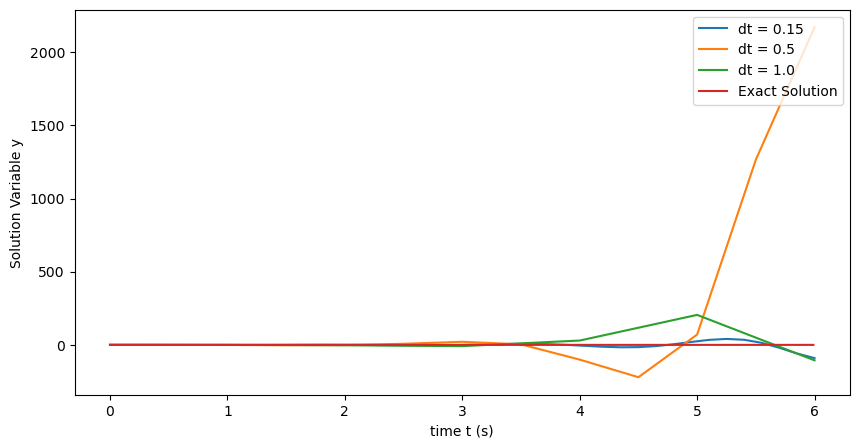

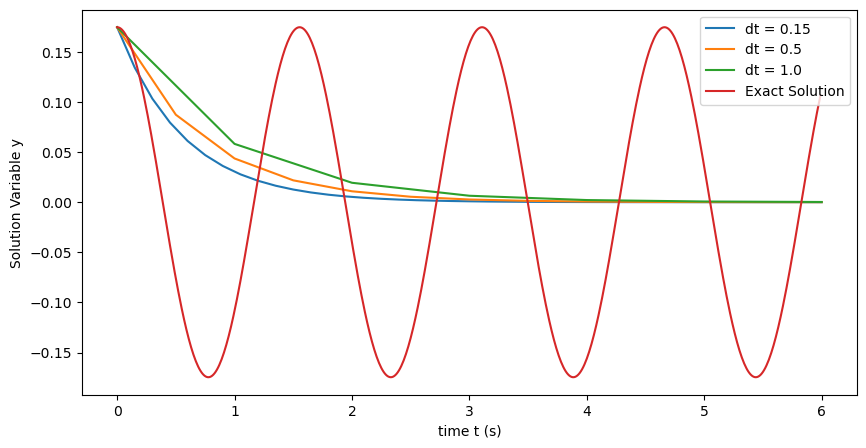

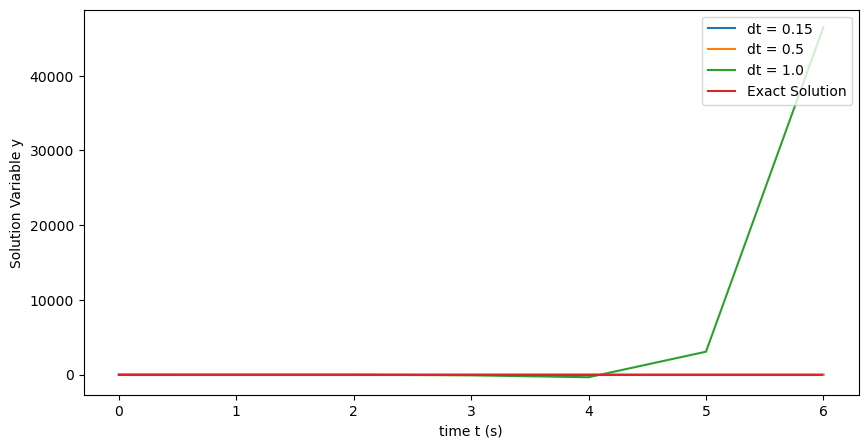

In [105]:
solve(g3a,dtvec = [0.15,0.5,1.0],Plot=True,filetag='g3a_largeDT')

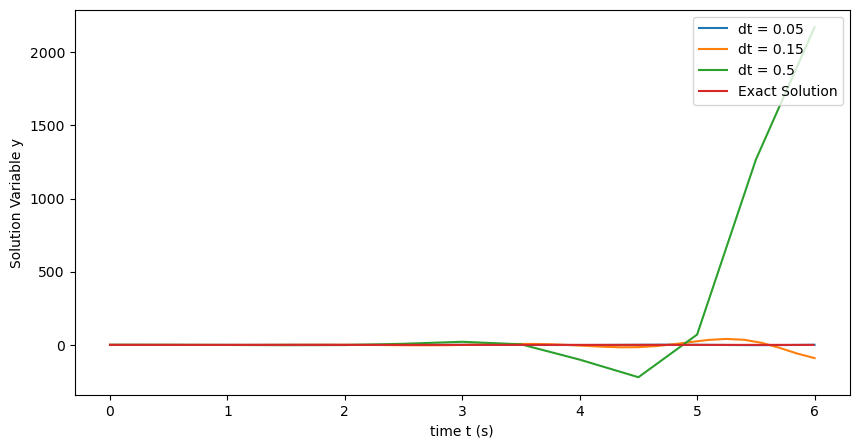

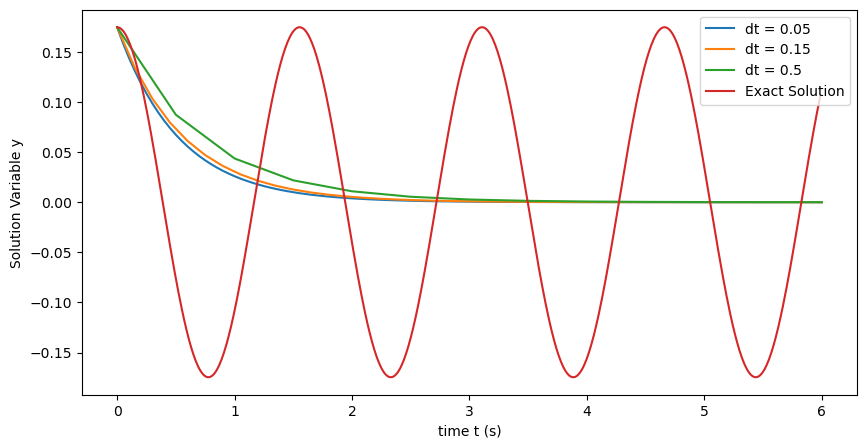

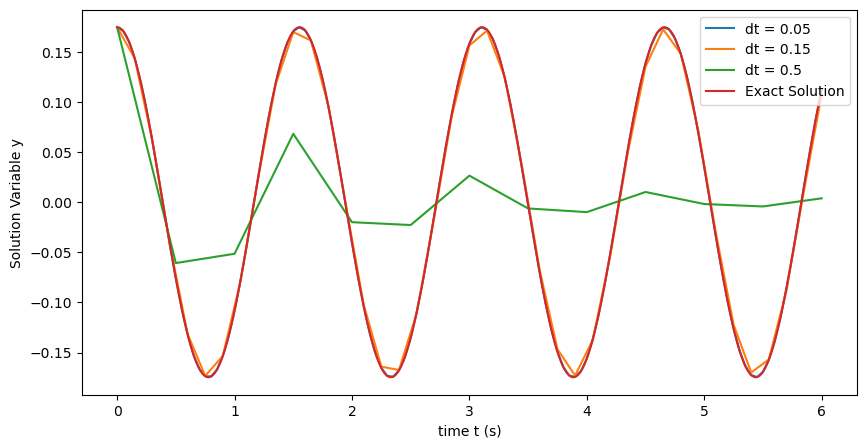

In [106]:
solve(g3a,dtvec = [0.05,0.15,0.5],Plot=True,filetag='g3a_smallDT')

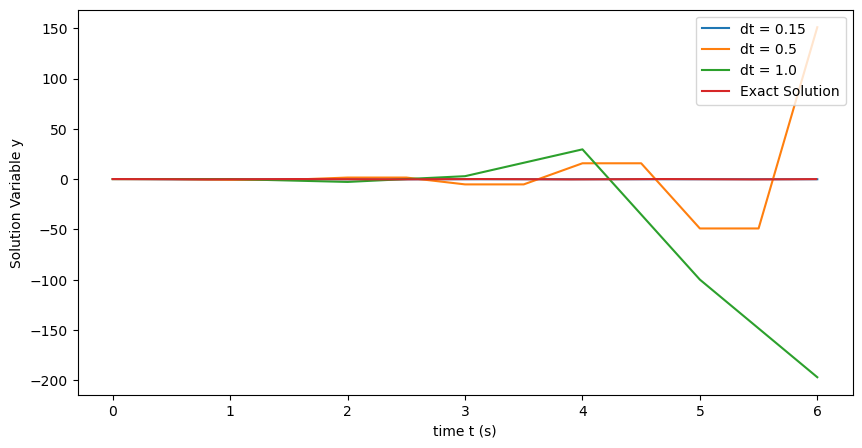

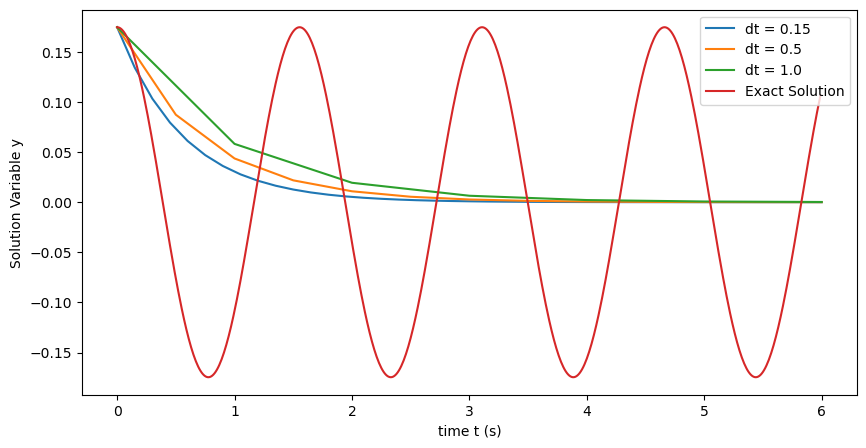

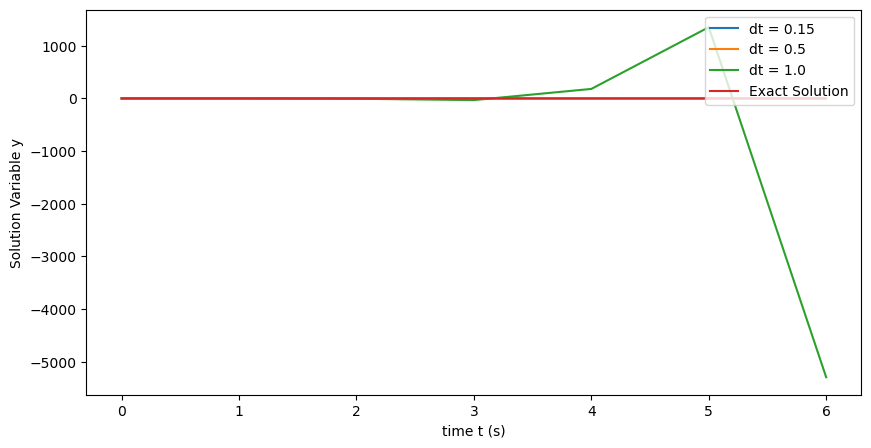

In [108]:
solve(g3b,dtvec = [0.15,0.5,1.0],Plot=True,filetag='g3b_largeDT')

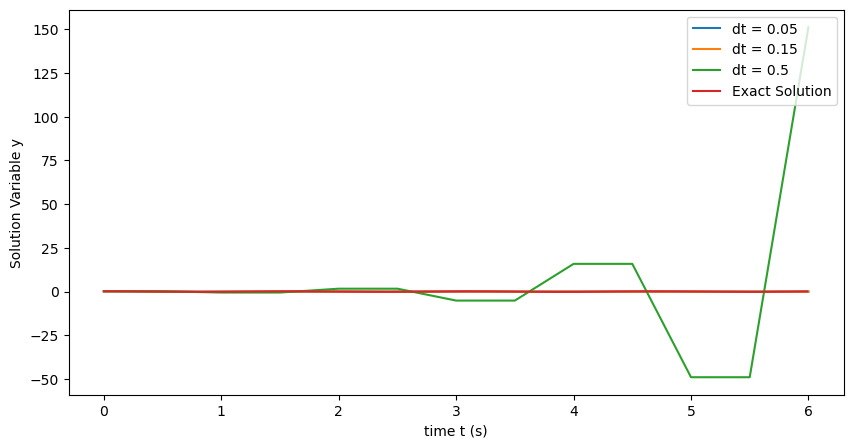

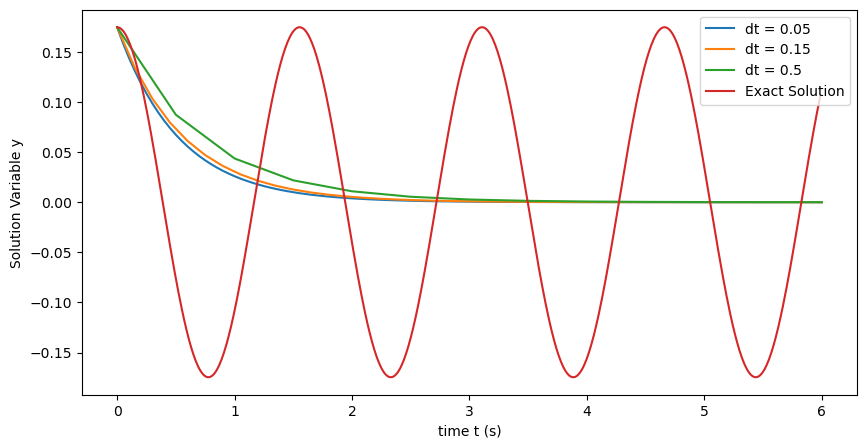

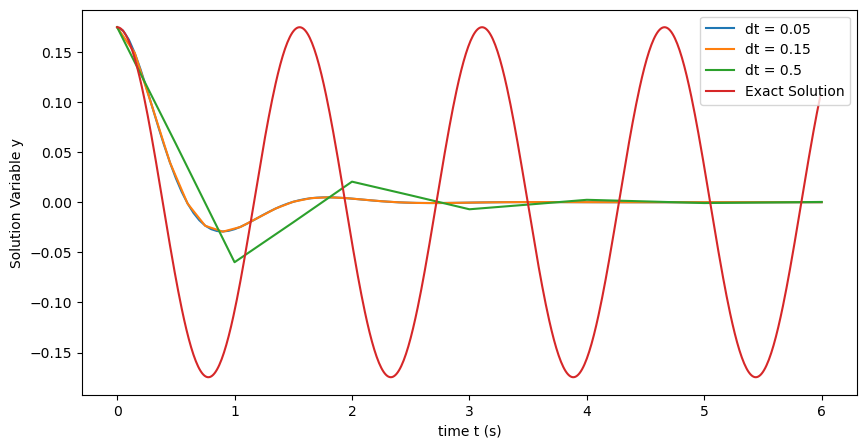

In [109]:
solve(g3b,dtvec = [0.05,0.15,0.5],Plot=True,filetag='g3b_smallDT')

In [19]:
# Problem 4
def g4(yvec,r):
    x = yvec[0]
    y = yvec[1]
    z = yvec[2]
    sigma = 10
    b = 8/3
    gvec = np.array([sigma*(y-x),r*x-y-x*z,x*y-b*z])
    return gvec

In [20]:
# Problem 5
# how to create an NxN matrix with the desired quantities?
# i=i, 0
# i = j+1, 1
# i = j-1, -1 -- make sure to account for the negative absorbed into A!!
eigA = np.zeros((51,51))
eigB = np.zeros((51,51))

N = 11 # replace with  for N in np.linspace(11,51,10):
A = np.zeros((N,N))
B = np.zeros((N,N))
for i in np.arange(0,N):
    for j in np.arange(0,N):
        if i == j:
            B[i,j] = -2
        elif i == j + 1:
            A[i,j] = 1
            B[i,j] = 1
        elif i == j - 1:
            A[i,j] = -1
            B[i,j] = 1

A[N-1,0] = -1
A[0,N-1] = 1 
B[N-1,0] = 1
B[0,N-1] = 1

# print(A)
# print(B)
w, v = np.linalg.eig(A)
# eigA[int((N-1)/10)-1,0:N] = w
w, v = np.linalg.eig(B)
# eigB[int((N-1)/10),0:N] = w
print(w,v)

# Something about the np.linalg.eig function is funky... requires a different datastructure eigA, eigB, to properly record these values?
# what *are* w and v? How are they different from the raw np.linalg.eig(A) output?

[-3.91898595e+00 -3.30972147e+00 -2.28462968e+00 -1.16916997e+00
  3.26033945e-16 -3.17492934e-01 -3.91898595e+00 -3.30972147e+00
 -2.28462968e+00 -1.16916997e+00 -3.17492934e-01] [[ 0.42640143 -0.42640143  0.42640143 -0.42640143  0.30151134 -0.42640143
  -0.01841903 -0.02851696  0.05025789 -0.00424298 -0.0593115 ]
 [-0.40912918  0.27923356 -0.06068325 -0.17713356  0.30151134 -0.35871171
  -0.1023461   0.34020586  0.4119669   0.38608658 -0.27818496]
 [ 0.35871171  0.06068325 -0.40912918  0.27923356  0.30151134 -0.17713356
   0.21481977 -0.41705796 -0.1675159   0.32501531 -0.40873667]
 [-0.27923356 -0.35871171  0.17713356  0.40912918  0.30151134  0.06068325
  -0.30989001  0.2060239  -0.36428691 -0.11605411 -0.40951737]
 [ 0.17713356  0.40912918  0.35871171  0.06068325  0.30151134  0.27923356
   0.37985481  0.14722403  0.27120276 -0.42143655 -0.2802792 ]
 [-0.06068325 -0.17713356 -0.27923356 -0.35871171  0.30151134  0.40912918
  -0.41904603 -0.39884638  0.28709455 -0.23408803 -0.06205436

In [21]:
 np.linalg.eig(A)

(array([-7.59873738e-18+1.97964288j, -7.59873738e-18-1.97964288j,
         3.43531608e-17+1.81926399j,  3.43531608e-17-1.81926399j,
        -1.76518664e-17+1.51149915j, -1.76518664e-17-1.51149915j,
        -3.89897194e-18+0.j        , -1.61323946e-17+0.56346511j,
        -1.61323946e-17-0.56346511j,  1.37461070e-17+1.08128163j,
         1.37461070e-17-1.08128163j]),
 array([[ 0.25364748-0.16300934j,  0.25364748+0.16300934j,
          0.28929802+0.08494556j,  0.28929802-0.08494556j,
          0.12525234+0.27426437j,  0.12525234-0.27426437j,
          0.30151134+0.j        ,  0.12525234-0.27426437j,
          0.12525234+0.27426437j,  0.12525234+0.27426437j,
          0.12525234-0.27426437j],
        [-0.19744794-0.22786707j, -0.19744794+0.22786707j,
          0.19744794-0.22786707j,  0.19744794+0.22786707j,
          0.12525234-0.27426437j,  0.12525234+0.27426437j,
          0.30151134+0.j        , -0.19744794+0.22786707j,
         -0.19744794-0.22786707j,  0.25364748+0.16300934j,
      

In [22]:
print(np.linalg.eig(A))

(array([-7.59873738e-18+1.97964288j, -7.59873738e-18-1.97964288j,
        3.43531608e-17+1.81926399j,  3.43531608e-17-1.81926399j,
       -1.76518664e-17+1.51149915j, -1.76518664e-17-1.51149915j,
       -3.89897194e-18+0.j        , -1.61323946e-17+0.56346511j,
       -1.61323946e-17-0.56346511j,  1.37461070e-17+1.08128163j,
        1.37461070e-17-1.08128163j]), array([[ 0.25364748-0.16300934j,  0.25364748+0.16300934j,
         0.28929802+0.08494556j,  0.28929802-0.08494556j,
         0.12525234+0.27426437j,  0.12525234-0.27426437j,
         0.30151134+0.j        ,  0.12525234-0.27426437j,
         0.12525234+0.27426437j,  0.12525234+0.27426437j,
         0.12525234-0.27426437j],
       [-0.19744794-0.22786707j, -0.19744794+0.22786707j,
         0.19744794-0.22786707j,  0.19744794+0.22786707j,
         0.12525234-0.27426437j,  0.12525234+0.27426437j,
         0.30151134+0.j        , -0.19744794+0.22786707j,
        -0.19744794-0.22786707j,  0.25364748+0.16300934j,
         0.25364748-0.

In [94]:
test = ''
len(test)

0